In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('sales_train.csv')

In [5]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [7]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


### EDA

#### Checking if Null and duplicate values present in the dataset.

In [8]:
# Function for checking null values.

def check_null_values(data):
    x = data.isnull().sum().sum()
    if x > 0:
        return x

In [9]:
# Function for checking duplicate values.

def check_duplicated_values(data):
    x = data.duplicated().sum()
    if x > 0:
        return x

In [10]:
# Function for removing duplicate values from the dataset.

def remove_duplicate_values(data, dup):
    dup_percent = round((dup / len(data) * 100), 2)
    if dup_percent < 3 :
        print(f'Since duplicate values {dup_percent} % is less than 3\nWe can drop the values')
        data.drop_duplicates(inplace=True)
        print('- > Successfully Dropped duplicate values')
    else:
        print('Need to fix duplicate as percentage is greater than 3')

In [11]:
na = check_null_values(df)
if na != None:
    print(f'There is null values present in the dataset {na}')
else:
    print('There is no missing values in the dataset')

There is no missing values in the dataset


In [12]:
dup = check_duplicated_values(df)
if dup != None:
    print(f'There are {dup} duplicate values present in the dataset')
    print('-> Fixing duplicate values....')
    remove_duplicate_values(df, dup)
else:
    print('There is no duplicate values present in the dataset')

There are 6 duplicate values present in the dataset
-> Fixing duplicate values....
Since duplicate values 0.0 % is less than 3
We can drop the values
- > Successfully Dropped duplicate values


In [13]:
# copying dataset to new.

df_copy = df.copy()

In [14]:
print(f'{df.shop_id.nunique()} unique shops listed in the dataset.')

60 unique shops listed in the dataset.


In [15]:
print(f'{df.item_id.nunique()} unique items registered for there 60 shops.')

21807 unique items registered for there 60 shops.


In [16]:
max_items_sold = df[['shop_id', 'item_id']].groupby('shop_id').count().sort_values('item_id', ascending=False).idxmax()[0]
min_items_sold = df[['shop_id', 'item_id']].groupby('shop_id').count().sort_values('item_id', ascending=False).idxmin()[0]

In [17]:
max_uniques_items_sold_by_shop = df[['shop_id', 'item_id']].groupby('shop_id').nunique().sort_values('item_id', ascending=False).idxmax()[1]
min_uniques_items_sold_by_shop = df[['shop_id', 'item_id']].groupby('shop_id').nunique().sort_values('item_id', ascending=False).idxmin()[1]

In [18]:
print(f'Max items are sold by the shop with id: {max_items_sold}')
print(f'Min items are sold by the shop with id: {min_items_sold}')

Max items are sold by the shop with id: 31
Min items are sold by the shop with id: 36


In [19]:
print(f'Max unique items were sold by the shop with id: {max_uniques_items_sold_by_shop}')
print(f'Min unique items were sold by the shop with id: {min_uniques_items_sold_by_shop}')

Max unique items were sold by the shop with id: 25
Min unique items were sold by the shop with id: 36


#### We can conclude that shop id 36 have the lowest unique items sold percentage in the 2013-2015 tenure.

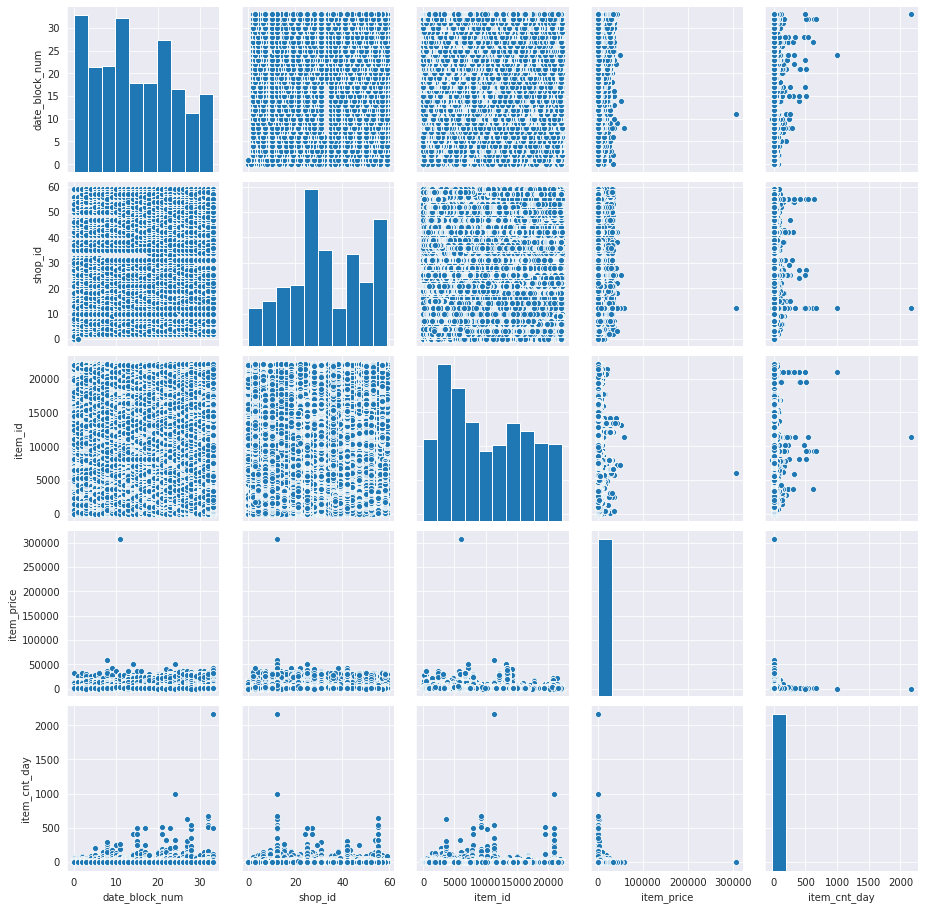

In [27]:
sns.pairplot(df);

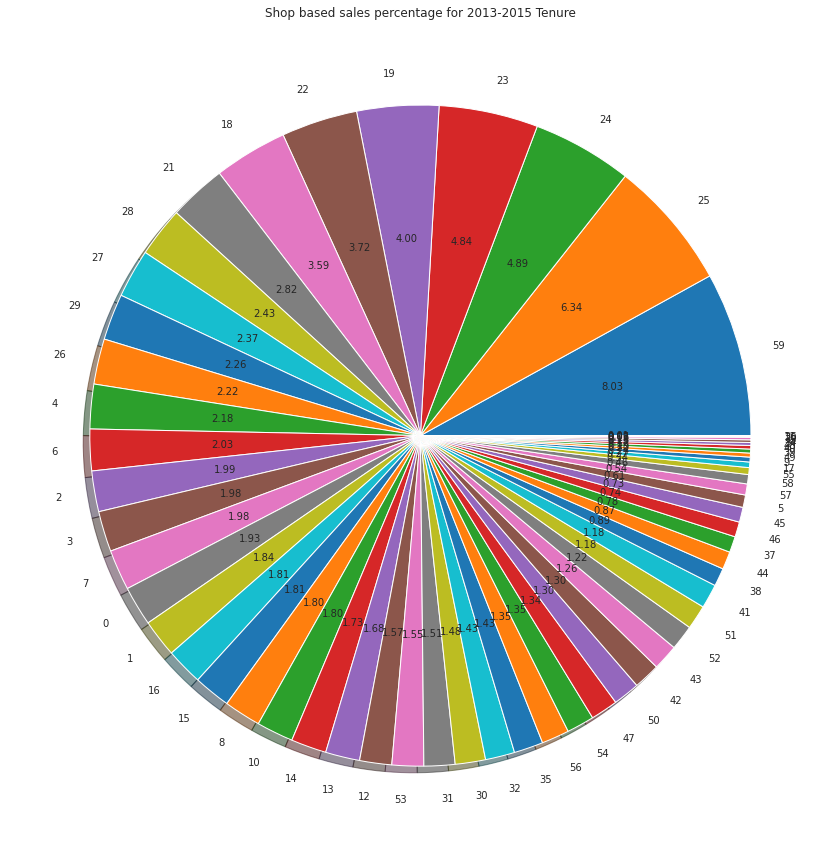

In [54]:
plt.figure(figsize=(17,12));
plt.title('Shop based sales percentage for 2013-2015 Tenure');
plt.pie(df['shop_id'].value_counts(), labels=df['shop_id'].unique(), autopct='%.2f', shadow=True);
plt.tight_layout();

In [69]:
max_sold_item = df['item_id'].value_counts().sort_values(ascending=False).idxmax()
print(f'Max sold items between tenure 2013 to 2015 is Item-{max_sold_item}')

Max sold items between tenure 2013 to 2015 is Item-20949
